In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
def read_dataset(pattern_match:str):
    files = glob.glob(pattern_match)
    data = []
    print(files)
    for file in files:
        name = file.split("_")[0].split("\\")[-1]
        instance = pd.read_csv(file, sep="\t")
        instance= instance.drop(['Cell2Volts', 'Cell3Volts', 'Cell4Volts', 'Cell5Volts', 'Cell6Volts',
            'Cell7Volts', 'Cell8Volts', 'Cell9Volts', 'Cell10Volts', 'Cell11Volts',
            'Cell12Volts', 'Cell13Volts', 'Cell14Volts', 'Cell15Volts',
            'Cell16Volts', 'Cell2IR', 'Cell3IR', 'Cell4IR', 'Cell5IR',
            'Cell6IR', 'Cell7IR', 'Cell8IR', 'Cell9IR', 'Cell10IR', 'Cell11IR',
            'Cell12IR', 'Cell13IR', 'Cell14IR', 'Cell15IR', 'Cell16IR', 'BP1PWM',
            'BP2PWM', 'BP3PWM', 'BP4PWM', 'BP5PWM', 'BP6PWM', 'BP7PWM', 'BP8PWM',
            'BP9PWM', 'BP10PWM', 'BP11PWM', 'BP12PWM', 'BP13PWM', 'BP14PWM',
            'BP15PWM', 'BP16PWM', 'Debug1', 'Debug2', 'Debug3', 'Unnamed: 75'], axis=1)
        instance["id"] = name
        #instance = instance[instance['Mode'] > 6] # remove intial charge
        discharge = instance[instance['Mode'] > 6]
        plt.plot(discharge["AhrOUT"], discharge["Cell1Volts"], )
        data.append(instance)
    return pd.concat(data)

['data/set1\\1_cell_cycle.txt', 'data/set1\\2_cell_cycle.txt', 'data/set1\\3_cell_cycle.txt', 'data/set1\\4_cell_cycle.txt', 'data/set1\\5_cell_cycle.txt', 'data/set1\\6_cell_cycle.txt', 'data/set1\\7_cell_cycle.txt', 'data/set1\\8_cell_cycle.txt', 'data/set1\\9_cell_cycle.txt']


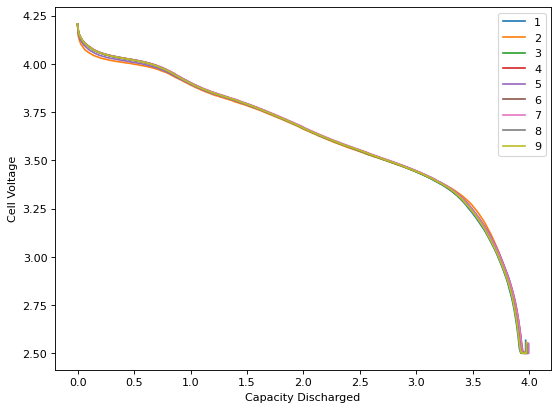

['data/set1\\1_cell_storage.txt', 'data/set1\\2_cell_storage.txt', 'data/set1\\3_cell_storage.txt', 'data/set1\\4_cell_storage.txt', 'data/set1\\5_cell_storage.txt', 'data/set1\\6_cell_storage.txt', 'data/set1\\7_cell_storage.txt', 'data/set1\\8_cell_storage.txt', 'data/set1\\9_cell_storage.txt']


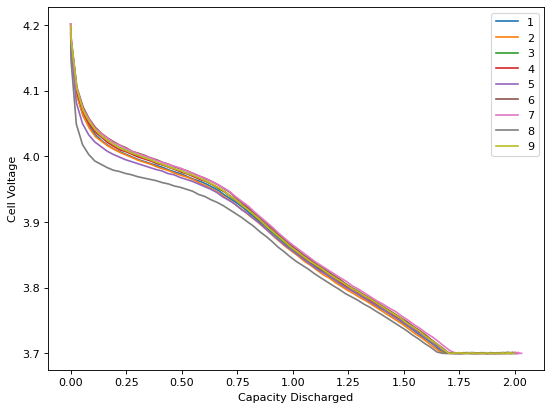

In [4]:
figure(figsize=(8, 6), dpi=80)
set1cycle = read_dataset("data/set1/*_cell_cycle.txt")
plt.xlabel("Capacity Discharged")
plt.ylabel("Cell Voltage")
plt.legend(range(1,11),loc="upper right")
plt.show()
figure(figsize=(8, 6), dpi=80)
set1storage = read_dataset("data/set1/*_cell_storage.txt")
plt.xlabel("Capacity Discharged")
plt.ylabel("Cell Voltage")
plt.legend(range(1,11),loc="upper right")
plt.show()

In [58]:
cycle.to_excel("cycle_data.xlsx")
storage.to_excel("10A_discharge.xlsx")

In [ ]:
cycle.columns

Index(['DateTime', 'SlaveNum', 'Cycle', 'Mode', 'SupplyVolts', 'LSupplyVolts',
       'SupplyAmps', 'PWM', 'SecTimer', 'AvgCellVolts', 'MaxCellVolts',
       'AvgIR', 'FallBackVolts', 'CVStarted', 'SlowAmps', 'AvgAmps',
       'FastAmps', 'SetAmps', 'AhrIN', 'AhrOUT', 'PackVolts', 'AvgPackVolts',
       'Fuel1', 'SumError', 'Cell1Volts', 'Cell1IR', 'id'],
      dtype='object')

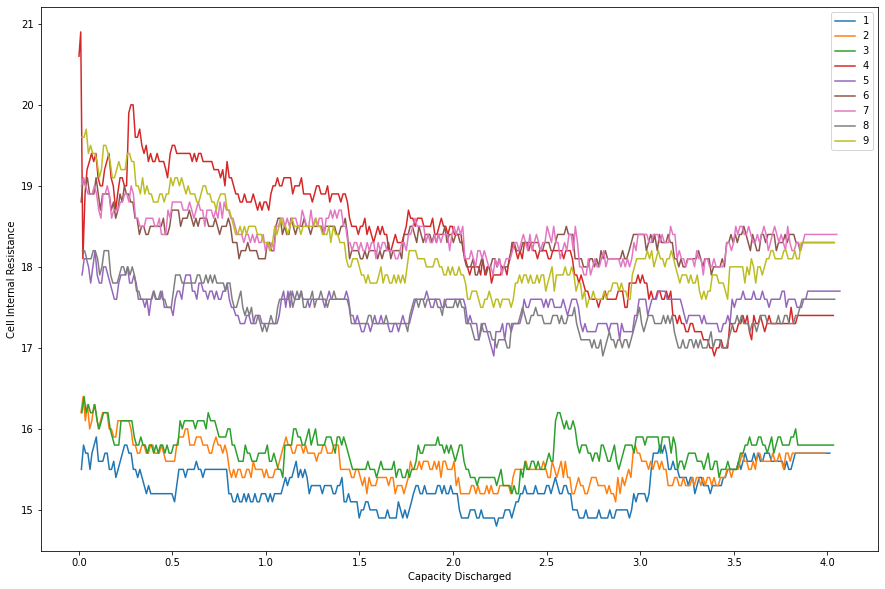

In [73]:
fig, ax = plt.subplots(figsize=(15,10))
for key, grp in cycle.groupby(['id']):
    grp = grp[grp.Mode == 6]
    grp = grp[grp.AvgIR != 0]
    grp = grp[grp.AhrOUT > 0]
    ax.plot(grp['AhrIN'], grp['Cell1IR'], label=key)

plt.xlabel("Capacity Discharged")
plt.ylabel("Cell Internal Resistance")
ax.legend(loc="upper right")
plt.show()

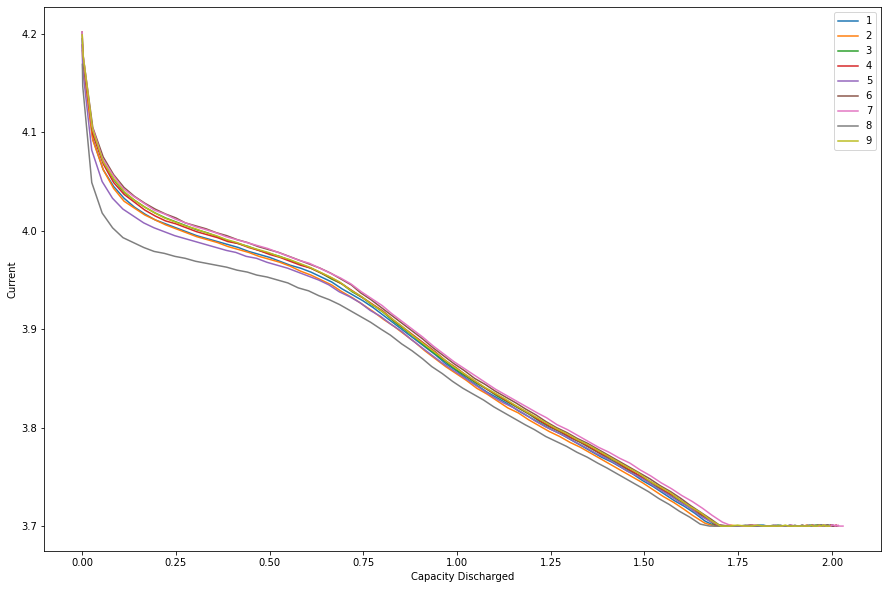

In [81]:
fig, ax = plt.subplots(figsize=(15,10))
for key, grp in storage.groupby(['id']):
    ax.plot(grp['AhrOUT'], grp['Cell1Volts'], label=key)

plt.xlabel("Capacity Discharged")
plt.ylabel("Voltage")
ax.legend(loc="upper right")
plt.show()

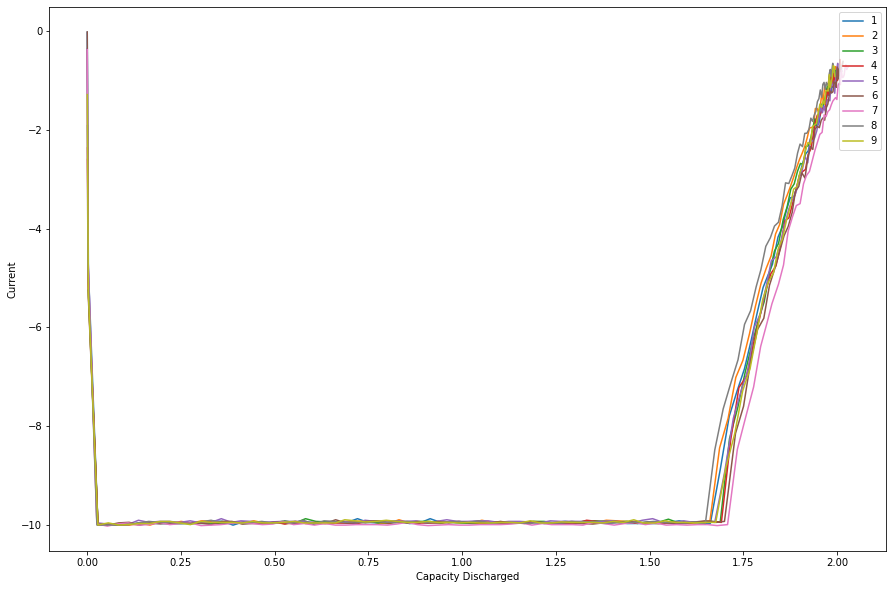

In [89]:
fig, ax = plt.subplots(figsize=(15,10))
for key, grp in storage.groupby(['id']):
    ax.plot(grp['AhrOUT'], grp['FastAmps'], label=key)

plt.xlabel("Capacity Discharged")
plt.ylabel("Current")
ax.legend(loc="upper right")
plt.show()

['data\\30_30A.txt', 'data\\40_40A.txt']


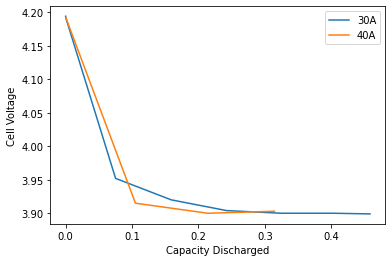

In [88]:
high_current = read_dataset("data/*_*A.txt")
plt.xlabel("Capacity Discharged")
plt.ylabel("Cell Voltage")
plt.legend(["30A", "40A"],loc="upper right")
plt.show()

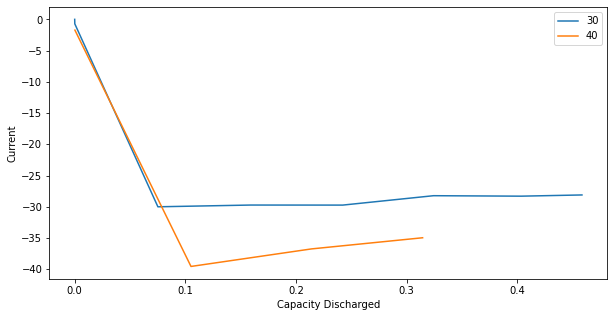

In [92]:
fig, ax = plt.subplots(figsize=(10,5))
for key, grp in high_current.groupby(['id']):
    ax.plot(grp['AhrOUT'], grp['FastAmps'], label=key)

plt.xlabel("Capacity Discharged")
plt.ylabel("Current")
ax.legend(loc="upper right")
plt.show()

['data/set2\\1_cell_stress_40A_2.txt']


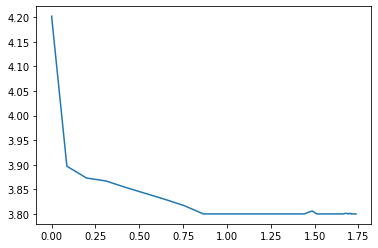

In [5]:
set2stress = read_dataset("data/set2/*_cell_stress_*.txt")

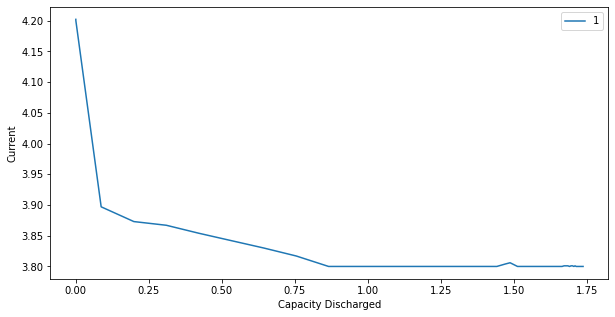

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
for key, grp in set2stress.groupby(['id']):
    ax.plot(grp['AhrOUT'], grp['Cell1Volts'], label=key)

plt.xlabel("Capacity Discharged")
plt.ylabel("Current")
ax.legend(loc="upper right")
plt.show()